In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from wordcloud import WordCloud
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("cleaned_blogs.csv")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1973,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,talk.religion.misc
1974,Newsgroups: talk.religion.misc\nPath: cantalou...,talk.religion.misc
1975,Newsgroups: talk.religion.misc\nPath: cantalou...,talk.religion.misc
1976,Xref: cantaloupe.srv.cs.cmu.edu alt.conspiracy...,talk.religion.misc


In [3]:
df.describe()

,Data,Labels
count,1978,1977
unique,1978,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [4]:
df.isnull().sum()

Data      0
Labels    1
dtype: int64

In [5]:
df = df.drop(index=1977)

In [6]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1972,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,talk.religion.misc
1973,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,talk.religion.misc
1974,Newsgroups: talk.religion.misc\nPath: cantalou...,talk.religion.misc
1975,Newsgroups: talk.religion.misc\nPath: cantalou...,talk.religion.misc


In [7]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [8]:
df.duplicated().sum()

0

# Text cleaning
1. Remove unwanted characters
2. Text normalization
3. Tokenization
4. lemmatization
5. Join the text

In [14]:
lemma = WordNetLemmatizer()

In [15]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vimal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
corpus = []

for i in range(len(df)):
    msg = re.sub('[^a-zA-Z]',' ',df['Data'][i]) #Clean the text
    msg = msg.lower() #Text normalization
    msg = msg.split() #Word tokenize
    msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')] #Lemmatization
    msg = ' '.join(msg) # Join sentences
    corpus.append(msg)

In [20]:
corpus

['path cantaloupe srv c cmu edu magnesium club cc cmu edu news sei cmu edu ci ohio state edu zaphod mp ohio state edu howland reston an net agate doc ic ac uk uknet mcsun germany eu net thoth mchp sni de horus ap mchp sni de frank frank uucp frank dwyer newsgroups alt atheism subject islamic genocide date apr gmt organization siemens nixdorf ag line distribution world message id r vej k horus ap mchp sni de reference r qe fido asd sgi com r ubl bd horus ap mchp sni de r ek uo fido asd sgi com nntp posting host ap mchp sni de article r ek uo fido asd sgi com livesey solntze wpd sgi com jon livesey writes article r ubl bd horus ap mchp sni de frank uucp frank dwyer writes article r qe fido asd sgi com livesey solntze wpd sgi com jon livesey writes noting particular society case mainland uk religously motivated murder murder kind say little whether inter religion murder elsewhere religiously motivated allows one conclude nothing inherent religion matter catholicism protestantism motivates

# Model Building

In [24]:
!pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ------ -------------------------------- 20.5/126.0 kB 320.0 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/126.0 kB 487.6 kB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 1.1 MB/s eta 0:00:00


In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer

In [26]:
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment

In [27]:
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Apply the function to the blog post texts

In [28]:
df['sentiment_score'] = df['Data'].apply(get_sentiment)

In [29]:
df

,Data,Labels,sentiment_score
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,-0.9964
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0.8856
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,-0.9975
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,-0.9999
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0.9844
...,...,...,...
1972,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,talk.religion.misc,0.9988
1973,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,talk.religion.misc,0.8635
1974,Newsgroups: talk.religion.misc\nPath: cantalou...,talk.religion.misc,0.9221
1975,Newsgroups: talk.religion.misc\nPath: cantalou...,talk.religion.misc,-0.5246


# Classify sentiments into positive, negative, and neutral

In [30]:
def classify_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

In [31]:
df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)

In [32]:
df

,Data,Labels,sentiment_score,sentiment_label
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,-0.9964,negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0.8856,positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,-0.9975,negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,-0.9999,negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0.9844,positive
...,...,...,...,...
1972,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,talk.religion.misc,0.9988,positive
1973,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,talk.religion.misc,0.8635,positive
1974,Newsgroups: talk.religion.misc\nPath: cantalou...,talk.religion.misc,0.9221,positive
1975,Newsgroups: talk.religion.misc\nPath: cantalou...,talk.religion.misc,-0.5246,negative


# Show the results

In [33]:
print(df[['Data', 'sentiment_score', 'sentiment_label']])

                                                   Data  sentiment_score  \
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...          -0.9964   
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....           0.8856   
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...          -0.9975   
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...          -0.9999   
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...           0.9844   
...                                                 ...              ...   
1972  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...           0.9988   
1973  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....           0.8635   
1974  Newsgroups: talk.religion.misc\nPath: cantalou...           0.9221   
1975  Newsgroups: talk.religion.misc\nPath: cantalou...          -0.5246   
1976  Xref: cantaloupe.srv.cs.cmu.edu alt.conspiracy...          -0.9811   

     sentiment_label  
0           negative  
1           positive  
2           negati

<Axes: xlabel='sentiment_label', ylabel='count'>

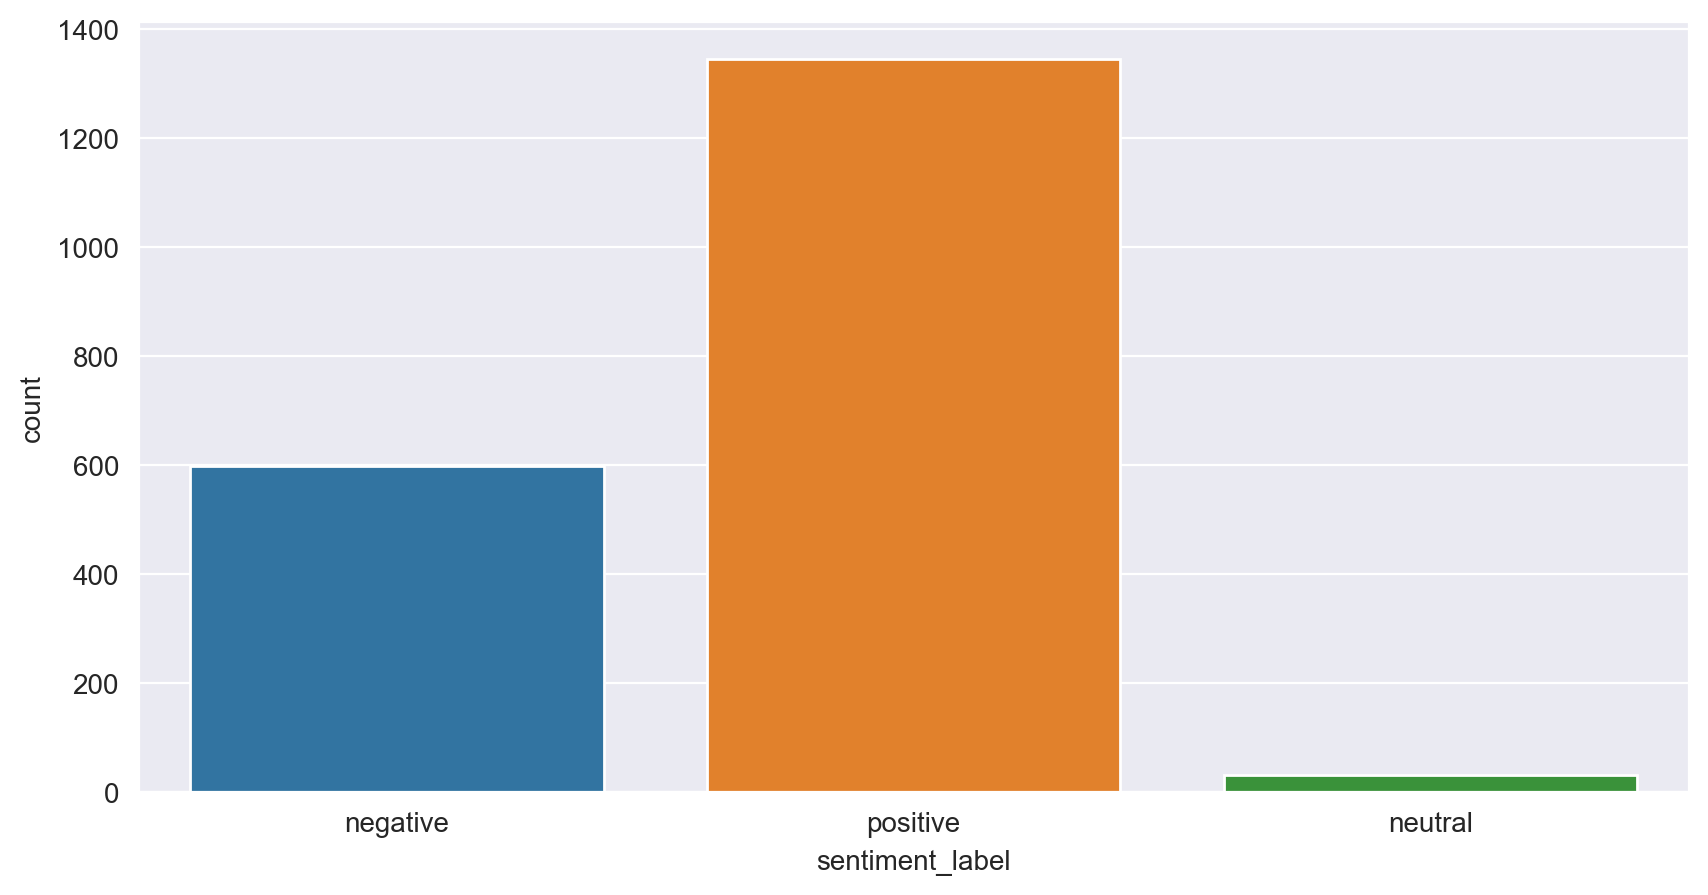

In [34]:
sns.countplot(x = df['sentiment_label'])

# Positive, Negative and Neutral data

In [43]:
Positive = df[df['sentiment_label'] == 'positive']

In [41]:
Negative = df[df['sentiment_label'] == 'negative']

In [42]:
Neutral = df[df['sentiment_label'] == 'neutral']

In [44]:
Positive

,Data,Labels,sentiment_score,sentiment_label
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0.8856,positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0.9844,positive
5,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,alt.atheism,0.9900,positive
7,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0.8643,positive
8,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,alt.atheism,0.7550,positive
...,...,...,...,...
1970,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,talk.religion.misc,0.7359,positive
1971,Newsgroups: talk.religion.misc\nPath: cantalou...,talk.religion.misc,0.9994,positive
1972,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,talk.religion.misc,0.9988,positive
1973,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,talk.religion.misc,0.8635,positive


In [45]:
Negative

,Data,Labels,sentiment_score,sentiment_label
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,-0.9964,negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,-0.9975,negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,-0.9999,negative
6,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,-0.8976,negative
11,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,-0.5360,negative
...,...,...,...,...
1964,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,talk.religion.misc,-0.8196,negative
1966,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,-0.8815,negative
1967,Newsgroups: talk.religion.misc\nPath: cantalou...,talk.religion.misc,-0.6223,negative
1975,Newsgroups: talk.religion.misc\nPath: cantalou...,talk.religion.misc,-0.5246,negative


In [46]:
Neutral 

,Data,Labels,sentiment_score,sentiment_label
85,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism,0.0,neutral
126,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,comp.graphics,0.0,neutral
131,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,comp.graphics,0.0,neutral
214,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,comp.os.ms-windows.misc,0.0,neutral
259,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,comp.os.ms-windows.misc,0.0,neutral
393,Newsgroups: comp.sys.ibm.pc.hardware\nPath: ca...,comp.sys.ibm.pc.hardware,0.0,neutral
403,Newsgroups: comp.sys.mac.hardware\nPath: canta...,comp.sys.mac.hardware,0.0,neutral
465,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,comp.sys.mac.hardware,0.0,neutral
471,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,comp.sys.mac.hardware,0.0,neutral
472,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,comp.sys.mac.hardware,0.0,neutral


# Worldcloud function

In [49]:
def worldcl(data,heading):
    txt = ' '.join(data['Data'])
    wc = WordCloud(background_color='white',width=700, height=200,
                  colormap='viridis').generate(txt)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(heading)

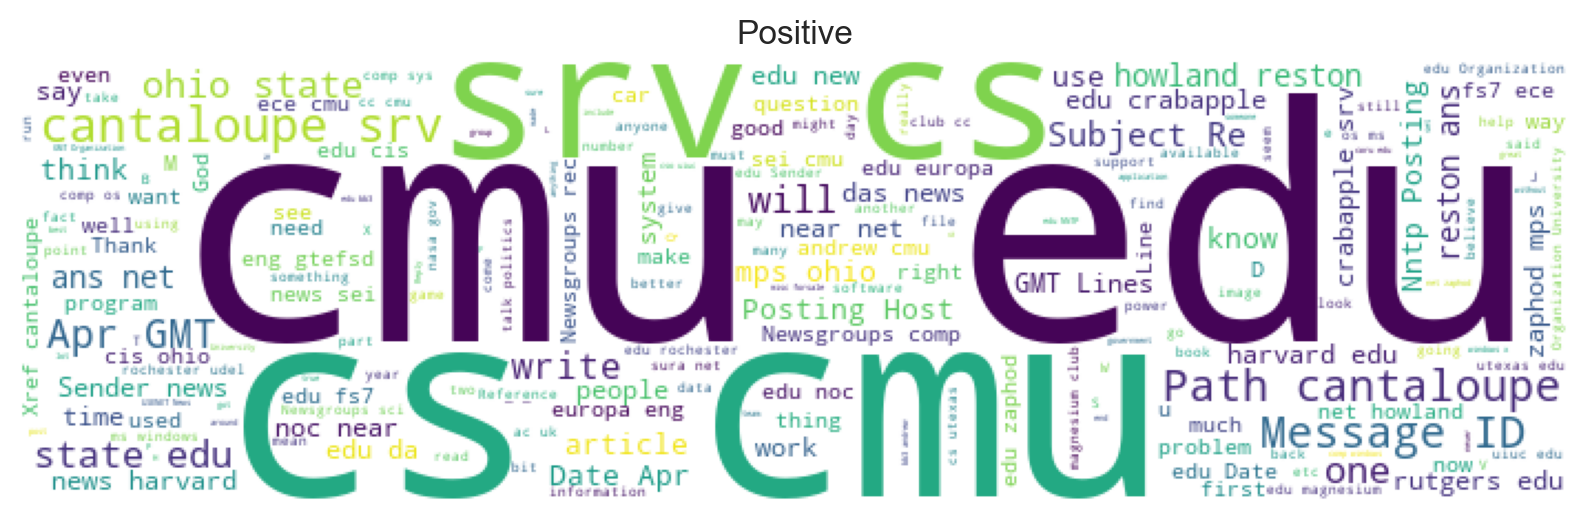

In [50]:
worldcl(Positive,'Positive')

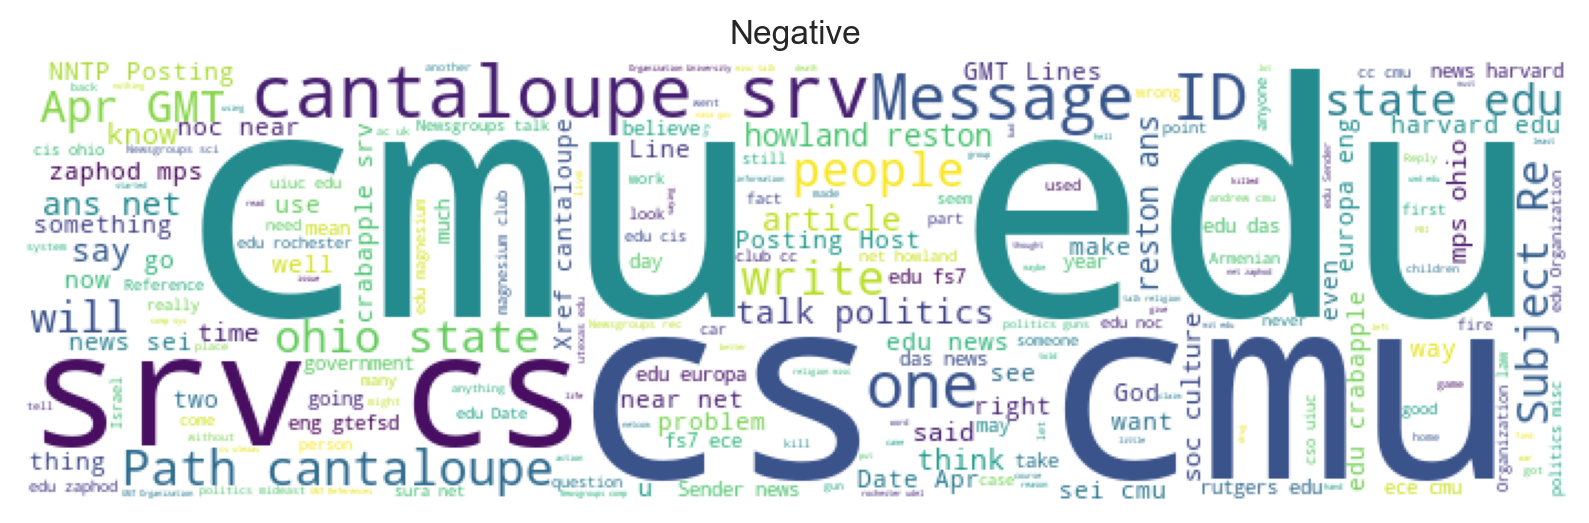

In [51]:
worldcl(Negative,'Negative')

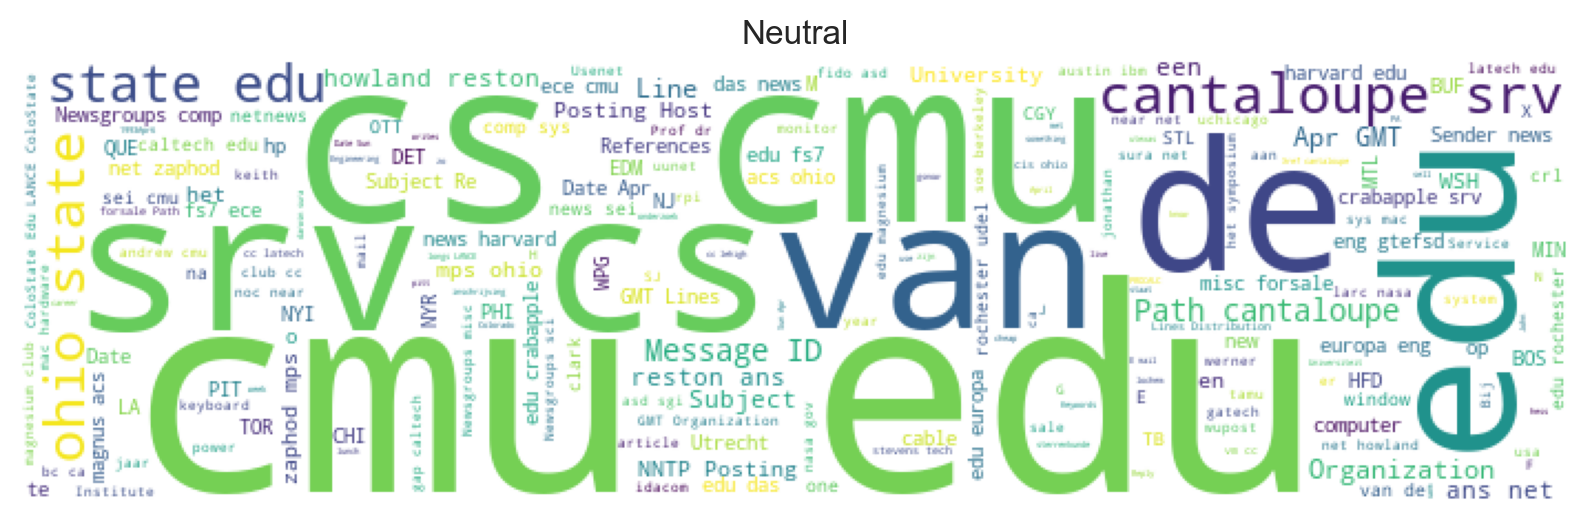

In [52]:
worldcl(Neutral ,'Neutral')